In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
temp=pd.read_csv('temperature_forecast.csv')
temp.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
temp.shape

(7752, 25)

In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [5]:
temp.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [6]:
temp.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
index_present_tmax= temp['Present_Tmax'].index[temp['Present_Tmax'].apply(np.isnan)]
index_present_tmin= temp['Present_Tmin'].index[temp['Present_Tmin'].apply(np.isnan)]

index_next_tmax   = temp['Next_Tmax'].index[temp['Next_Tmax'].apply(np.isnan)]
index_next_tmin   = temp['Next_Tmin'].index[temp['Next_Tmin'].apply(np.isnan)]

index_LDAPS_RHmax = temp['LDAPS_RHmax'].index[temp['LDAPS_RHmax'].apply(np.isnan)]
index_LDAPS_RHmin = temp['LDAPS_RHmin'].index[temp['LDAPS_RHmin'].apply(np.isnan)]

index_Tmax_lapse  = temp['LDAPS_Tmax_lapse'].index[temp['LDAPS_Tmax_lapse'].apply(np.isnan)]
index_Tmin_lapse  = temp['LDAPS_Tmin_lapse'].index[temp['LDAPS_Tmin_lapse'].apply(np.isnan)]

index_LDAPS_WS    = temp['LDAPS_WS'].index[temp['LDAPS_WS'].apply(np.isnan)]
index_LDAPS_LH    = temp['LDAPS_LH'].index[temp['LDAPS_LH'].apply(np.isnan)]

index_LDAPS_CC1   = temp['LDAPS_CC1'].index[temp['LDAPS_CC1'].apply(np.isnan)]
index_LDAPS_CC2   = temp['LDAPS_CC2'].index[temp['LDAPS_CC2'].apply(np.isnan)]
index_LDAPS_CC3   = temp['LDAPS_CC3'].index[temp['LDAPS_CC3'].apply(np.isnan)]
index_LDAPS_CC4   = temp['LDAPS_CC4'].index[temp['LDAPS_CC4'].apply(np.isnan)]

index_LDAPS_PPT1  = temp['LDAPS_PPT1'].index[temp['LDAPS_PPT1'].apply(np.isnan)]
index_LDAPS_PPT2  = temp['LDAPS_PPT2'].index[temp['LDAPS_PPT2'].apply(np.isnan)]
index_LDAPS_PPT3  = temp['LDAPS_PPT3'].index[temp['LDAPS_PPT3'].apply(np.isnan)]
index_LDAPS_PPT4  = temp['LDAPS_PPT4'].index[temp['LDAPS_PPT4'].apply(np.isnan)]


if list(index_present_tmax) == list(index_present_tmin):
    print('Lists are identical')
else: print('Unidentical lists')
    
if list(index_next_tmax) == list(index_next_tmin):
    print('Lists are identical')
else: print('Unidentical lists')
    
if list(index_LDAPS_RHmax)==list(index_LDAPS_RHmin)==list(index_Tmax_lapse)==list(index_Tmin_lapse)==list(index_LDAPS_WS)==list(index_LDAPS_LH)==list(index_LDAPS_CC1)==list(index_LDAPS_CC2)==list(index_LDAPS_CC3)==list(index_LDAPS_CC4)==list(index_LDAPS_PPT1)==list(index_LDAPS_PPT2)==list(index_LDAPS_PPT3)==list(index_LDAPS_PPT4):
    print('Lists are identical')
else: print('Unidentical lists')

Lists are identical
Lists are identical
Lists are identical


In [8]:
temp.dropna(axis=0,inplace=True)
temp.reset_index(drop=True)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7584,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7585,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7586,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [9]:
temp.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
(temp==0).sum(axis=0)

station                0
Date                   0
Present_Tmax           0
Present_Tmin           0
LDAPS_RHmin            0
LDAPS_RHmax            0
LDAPS_Tmax_lapse       0
LDAPS_Tmin_lapse       0
LDAPS_WS               0
LDAPS_LH               0
LDAPS_CC1            104
LDAPS_CC2             93
LDAPS_CC3             75
LDAPS_CC4            135
LDAPS_PPT1          4789
LDAPS_PPT2          5094
LDAPS_PPT3          5237
LDAPS_PPT4          5690
lat                    0
lon                    0
DEM                    0
Slope                  0
Solar radiation        0
Next_Tmax              0
Next_Tmin              0
dtype: int64

In [11]:
temp.duplicated().sum()

0

In [12]:
temp.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,0.355528,0.317546,0.298268,0.589008,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,0.257922,0.249833,0.253392,1.927577,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,0.140324,0.100950,0.081495,0.000000,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,0.311676,0.261795,0.227459,0.000000,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,0.557164,0.496444,0.498127,0.052594,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


In [13]:
temp[["day", "month", "year"]] = temp["Date"].str.split("-", expand = True)
temp=temp.drop('Date',axis=1)
temp.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013


In [14]:
temp_cc = temp[['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']]
temp_cc.head()

,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
0,0.233947,0.203896,0.161697,0.130928
1,0.225508,0.251771,0.159444,0.127727
2,0.209344,0.257469,0.204091,0.142125
3,0.216372,0.226002,0.161157,0.134249
4,0.151407,0.249995,0.178892,0.170021


In [15]:
temp_ppt = temp[['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']]
temp_ppt.head()

,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


In [16]:
max_ppt=temp_ppt.max(axis = 1)
min_ppt=temp_ppt.min(axis = 1)

max_cc=temp_cc.max(axis = 1)
min_cc=temp_cc.min(axis = 1)

In [17]:
Max_LDAPS_PPT=max_ppt.to_frame()
Min_LDAPS_PPT=min_ppt.to_frame()
Max_LDAPS_CC=max_cc.to_frame()
Min_LDAPS_CC=min_cc.to_frame()

In [18]:
temp1=pd.concat([Max_LDAPS_PPT,Min_LDAPS_PPT,Max_LDAPS_CC,Min_LDAPS_CC],axis=1)
temp1.columns=['Max_LDAPS_PPT','Min_LDAPS_PPT','Max_LDAPS_CC','Min_LDAPS_CC']
temp1.head()

,Max_LDAPS_PPT,Min_LDAPS_PPT,Max_LDAPS_CC,Min_LDAPS_CC
0,0.0,0.0,0.233947,0.130928
1,0.0,0.0,0.251771,0.127727
2,0.0,0.0,0.257469,0.142125
3,0.0,0.0,0.226002,0.134249
4,0.0,0.0,0.249995,0.151407


In [19]:
temp_fore=pd.concat([temp,temp1],axis=1)
temp_fore.reset_index(drop=True)
temp_fore=temp_fore.drop(['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],axis=1)
temp_fore.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year,Max_LDAPS_PPT,Min_LDAPS_PPT,Max_LDAPS_CC,Min_LDAPS_CC
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,06,2013,0.0,0.0,0.233947,0.130928
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,06,2013,0.0,0.0,0.251771,0.127727
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,06,2013,0.0,0.0,0.257469,0.142125
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,06,2013,0.0,0.0,0.226002,0.134249
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,06,2013,0.0,0.0,0.249995,0.151407


In [20]:
temp_fore.shape

(7588, 23)

In [21]:
temp_fore=temp_fore.drop(['station','day','month','year','lat','lon','DEM','Slope'],axis=1)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

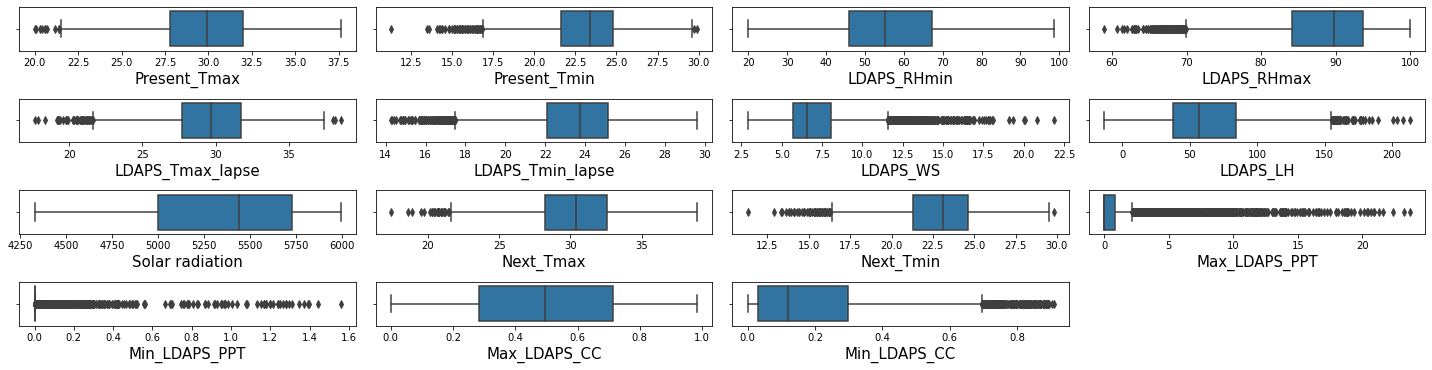

In [23]:
plt.figure(figsize=(20,6),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [24]:
# importing zscore for outliers
from scipy.stats import zscore

def threshold():
    for i in np.arange(3,5,0.2):
        pp=temp_fore.copy()
        pp=pp[(z<i).all(axis=1)]
        loss=(temp_fore.shape[0]-pp.shape[0])/temp_fore.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

        
z=np.abs(zscore(temp_fore))
print(threshold())

With threshold 3.0 data loss is 7.87%
With threshold 3.2 data loss is 6.17%
With threshold 3.4 data loss is 4.68%
With threshold 3.6 data loss is 3.84%
With threshold 3.8 data loss is 3.29%
With threshold 4.0 data loss is 2.75%
With threshold 4.2 data loss is 2.39%
With threshold 4.4 data loss is 2.06%
With threshold 4.6 data loss is 1.87%
With threshold 4.8 data loss is 1.66%
None


In [25]:
temp_fore=temp_fore[(z<4.4).all(axis=1)]

In [26]:
temp_fore.skew()

Present_Tmax       -0.259258
Present_Tmin       -0.335582
LDAPS_RHmin         0.281417
LDAPS_RHmax        -0.832972
LDAPS_Tmax_lapse   -0.195088
LDAPS_Tmin_lapse   -0.542517
LDAPS_WS            1.359460
LDAPS_LH            0.658448
Solar radiation    -0.512718
Next_Tmax          -0.319884
Next_Tmin          -0.371433
Max_LDAPS_PPT       2.766346
Min_LDAPS_PPT       7.571530
Max_LDAPS_CC        0.036510
Min_LDAPS_CC        1.264204
dtype: float64

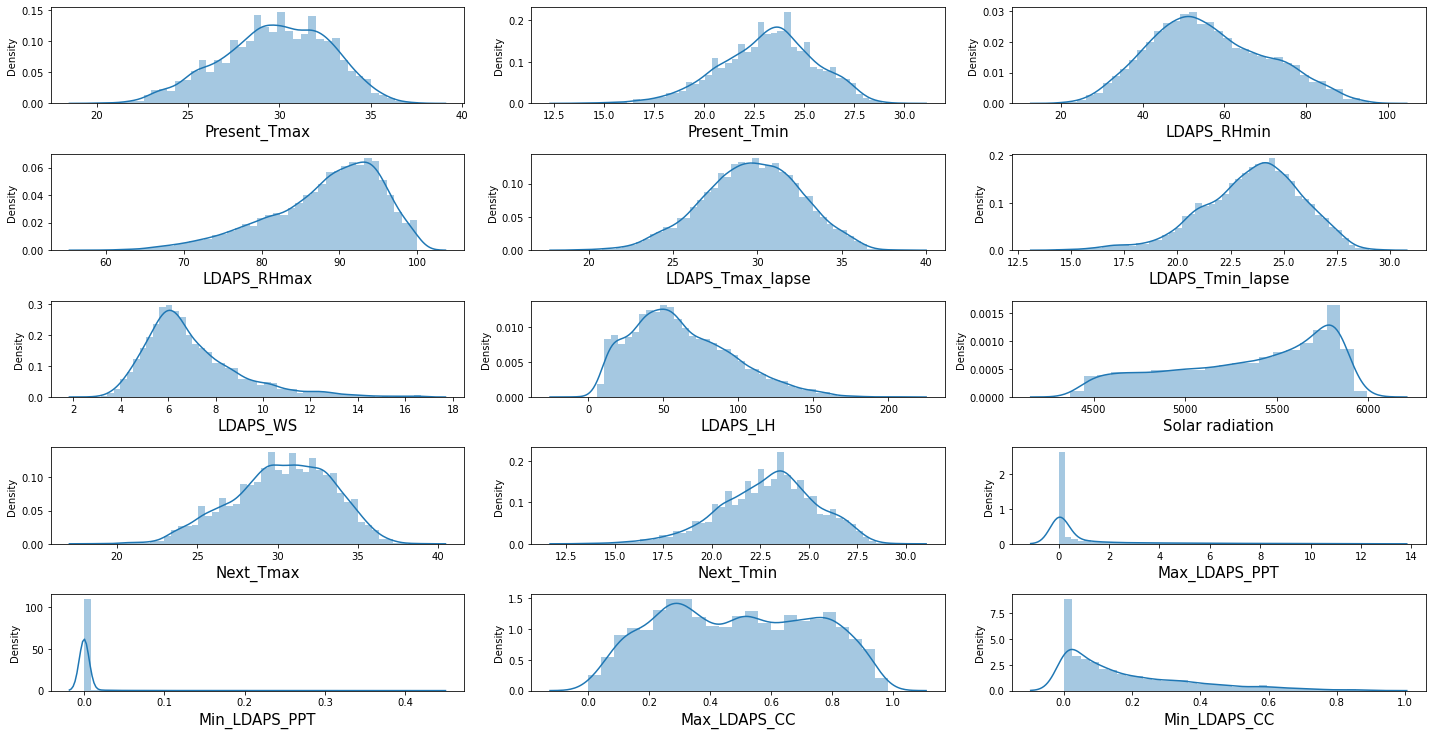

In [27]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

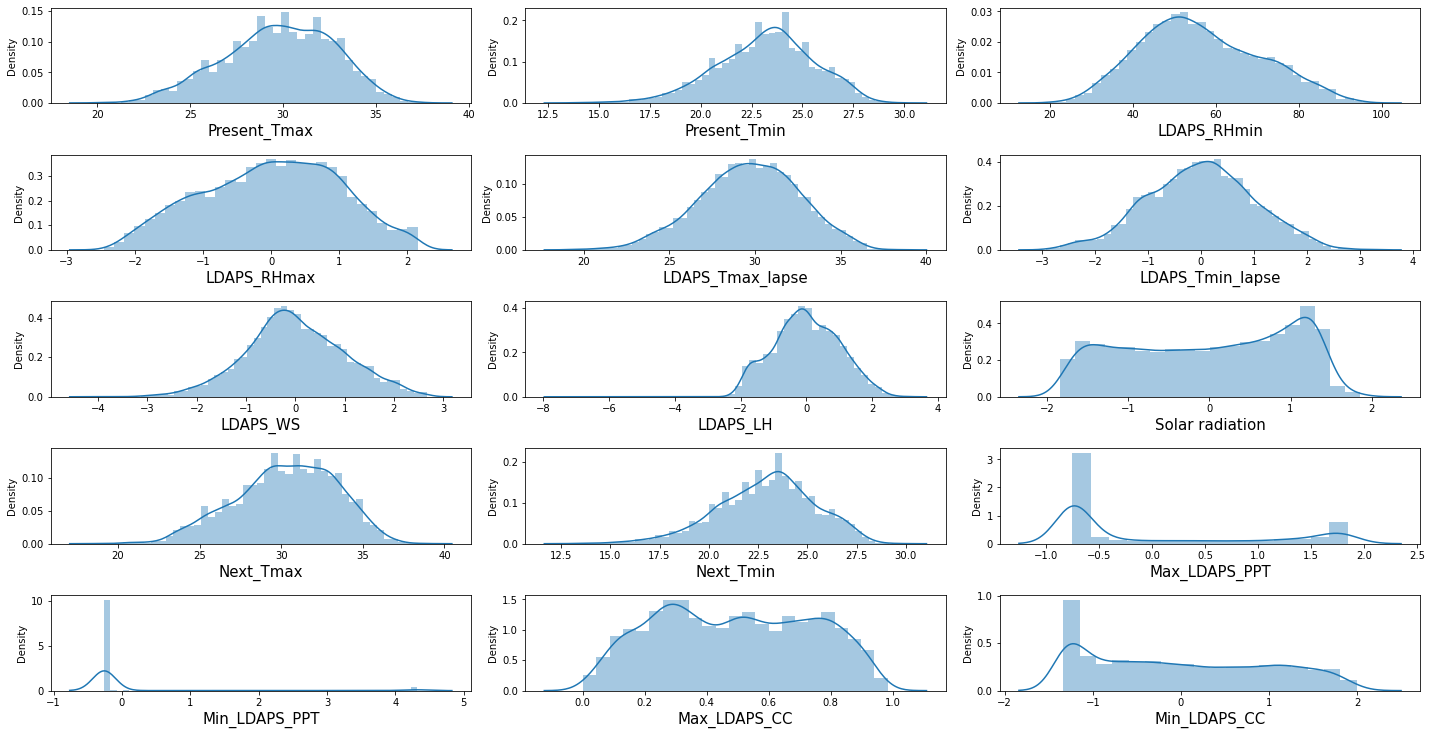

In [28]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

for i in temp_fore:
    if np.abs(temp_fore[i].skew())>0.5:
        temp_fore[i]=pt.fit_transform(temp_fore[i].values.reshape(-1,1))

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

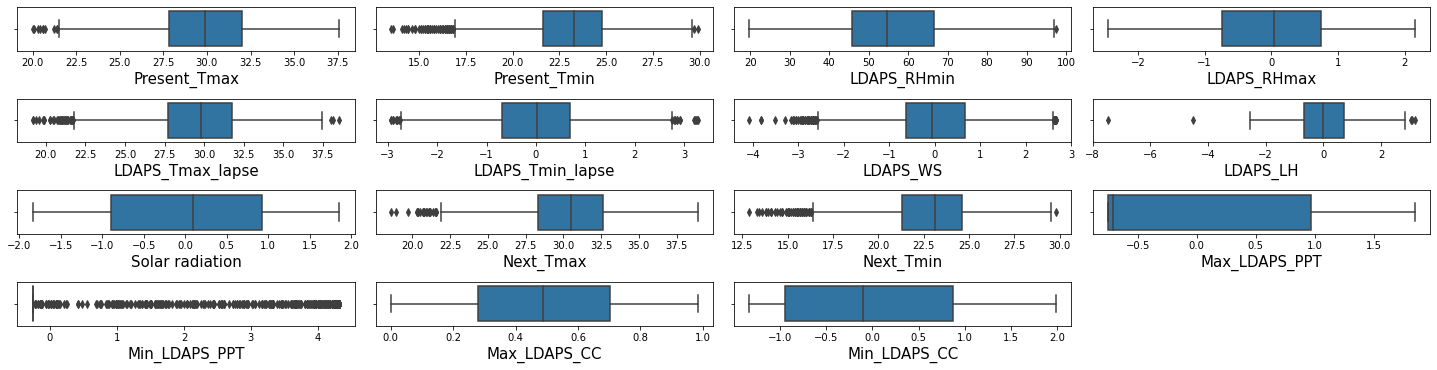

In [29]:
plt.figure(figsize=(20,6),facecolor='white')
plotnumber=1
for i in temp_fore:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(temp_fore[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [30]:
temp_fore.shape

(7432, 15)

In [31]:
x_tmax=temp_fore[['Present_Tmax','LDAPS_RHmax','LDAPS_Tmax_lapse','Max_LDAPS_PPT','Max_LDAPS_CC','Solar radiation','LDAPS_WS','LDAPS_LH','Next_Tmax']]
x_tmax.head()

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,Max_LDAPS_PPT,Max_LDAPS_CC,Solar radiation,LDAPS_WS,LDAPS_LH,Next_Tmax
0,28.7,0.292315,28.074101,-0.753535,0.233947,1.856756,0.119084,0.335818,29.1
1,31.9,0.205634,29.850689,-0.753535,0.251771,1.406367,-0.607675,-0.182302,30.5
2,31.6,-0.751586,30.091292,-0.753535,0.257469,1.386243,-0.294313,-1.400983,31.1
3,32.0,1.329151,29.704629,-0.753535,0.226002,1.363297,-0.639054,0.231557,31.7
4,31.4,0.131092,29.113934,-0.753535,0.249995,1.372293,-0.575720,1.284288,31.2


In [32]:
x_tmax.shape

(7432, 9)

In [33]:
x_tmin=temp_fore[['Present_Tmin','LDAPS_RHmin','LDAPS_Tmin_lapse','Min_LDAPS_PPT','Min_LDAPS_CC','Solar radiation','LDAPS_WS','LDAPS_LH','Next_Tmin']]
x_tmin.head()

,Present_Tmin,LDAPS_RHmin,LDAPS_Tmin_lapse,Min_LDAPS_PPT,Min_LDAPS_CC,Solar radiation,LDAPS_WS,LDAPS_LH,Next_Tmin
0,21.4,58.255688,-0.314286,-0.258738,0.002558,1.856756,0.119084,0.335818,21.2
1,21.6,52.263397,0.141669,-0.258738,-0.021884,1.406367,-0.607675,-0.182302,22.5
2,23.3,48.690479,0.390824,-0.258738,0.085554,1.386243,-0.294313,-1.400983,23.9
3,23.4,58.239788,-0.176431,-0.258738,0.027572,1.363297,-0.639054,0.231557,24.3
4,21.9,56.174095,-0.105949,-0.258738,0.151518,1.372293,-0.575720,1.284288,22.5


In [34]:
x_tmin.shape

(7432, 9)

In [35]:
x_Tmax=x_tmax.drop(['Next_Tmax'],axis=1)
y_Tmax=x_tmax['Next_Tmax']


x_Tmin=x_tmin.drop(['Next_Tmin'],axis=1)
y_Tmin=x_tmin['Next_Tmin']

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scale=scaler.fit_transform(x_Tmax)
x_Tmax=pd.DataFrame(x_scale,columns=x_Tmax.columns)
x_Tmax

,Present_Tmax,LDAPS_RHmax,LDAPS_Tmax_lapse,Max_LDAPS_PPT,Max_LDAPS_CC,Solar radiation,LDAPS_WS,LDAPS_LH
0,0.494318,0.596549,0.459531,0.0,0.237204,1.000000,0.621593,0.734775
1,0.676136,0.577707,0.551256,0.0,0.255336,0.878145,0.513855,0.685996
2,0.659091,0.369635,0.563678,0.0,0.261133,0.872701,0.560309,0.571264
3,0.681818,0.821926,0.543715,0.0,0.229121,0.866492,0.509204,0.724959
4,0.647727,0.561503,0.513217,0.0,0.253529,0.868926,0.518593,0.824068
...,...,...,...,...,...,...,...,...
7427,0.176136,0.236649,0.446035,0.0,0.053023,0.027162,0.603285,0.510863
7428,0.142045,0.362108,0.388840,0.0,0.066816,0.022444,0.522189,0.766420
7429,0.187500,0.249059,0.370623,0.0,0.081643,0.022942,0.561356,0.741490
7430,0.187500,0.217729,0.404602,0.0,0.075465,0.021314,0.597979,0.671590


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scale=scaler.fit_transform(x_Tmin)
x_Tmin=pd.DataFrame(x_scale,columns=x_Tmin.columns)
x_Tmin

,Present_Tmin,LDAPS_RHmin,LDAPS_Tmin_lapse,Min_LDAPS_PPT,Min_LDAPS_CC,Solar radiation,LDAPS_WS,LDAPS_LH
0,0.481707,0.495071,0.421788,0.0,0.401784,1.000000,0.621593,0.734775
1,0.493902,0.417938,0.495349,0.0,0.394431,0.878145,0.513855,0.685996
2,0.597561,0.371947,0.535547,0.0,0.426752,0.872701,0.560309,0.571264
3,0.603659,0.494866,0.444029,0.0,0.409309,0.866492,0.509204,0.724959
4,0.512195,0.468277,0.455400,0.0,0.446596,0.868926,0.518593,0.824068
...,...,...,...,...,...,...,...,...
7427,0.262195,0.063000,0.152803,0.0,0.000000,0.027162,0.603285,0.510863
7428,0.237805,0.132584,0.130725,0.0,0.000002,0.022444,0.522189,0.766420
7429,0.219512,0.089417,0.175138,0.0,0.000000,0.022942,0.561356,0.741490
7430,0.256098,0.054654,0.173106,0.0,0.000000,0.021314,0.597979,0.671590


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [39]:
from sklearn.model_selection import train_test_split
# finding best random state
max_r2_score_tmax=0
max_tmax_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_Tmax,y_Tmax,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_tmax=lr.predict(x_test)
    r2_tmax=r2_score(y_test,pred_tmax)
    error_tmax=mean_squared_error(y_test,pred_tmax)
    if r2_tmax>max_r2_score_tmax:
        max_r2_score_tmax=r2_tmax
        max_tmax_rs=i
print('\nmax_rs of tmax:',max_tmax_rs)


max_rs of tmax: 26


In [40]:
# finding best random state
max_r2_score_tmin=0
max_tmin_rs=0
for i in range(1,200):
    train_x,test_x,train_y,test_y=train_test_split(x_Tmin,y_Tmin,test_size=.25,random_state=i)
    lr=LinearRegression()
    lr.fit(train_x,train_y)
    pred_tmin=lr.predict(test_x)
    r2_tmin=r2_score(test_y,pred_tmin)
    error_tmin=mean_squared_error(test_y,pred_tmin)
    if r2_tmin>max_r2_score_tmin:
        max_r2_score_tmin=r2_tmin
        max_tmin_rs=i
print('\nmax_rs of tmin:',max_tmin_rs)


max_rs of tmin: 28


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_Tmax,y_Tmax,test_size=.25,random_state=max_tmax_rs)
train_x,test_x,train_y,test_y=train_test_split(x_Tmin,y_Tmin,test_size=.25,random_state=max_tmin_rs)

In [43]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.fit(train_x,train_y)
pred_tmax=lr.predict(x_test)
pred_tmin=lr.predict(test_x)
r2_tmax=r2_score(y_test,pred_tmax)
r2_tmin=r2_score(test_y,pred_tmin)
error_tmax=mean_squared_error(y_test,pred_tmax)
error_tmin=mean_squared_error(test_y,pred_tmin)
scr_tmax=cross_val_score(lr,x_Tmax,y_Tmax,cv=10)
scr_tmin=cross_val_score(lr,x_Tmin,y_Tmin,cv=10)

print(f"r2 score for Next_Tmax:{r2_tmax*100:.2f}")
print(f'error for Next_Tmax:{error_tmax}')
print(f'cross val score for Next_Tmax:{scr_tmax.mean()*100:.2f}')

print(f"\nr2 score for Next_Tmin:{r2_tmin*100:.2f}")
print(f'error for Next_Tmin:{error_tmin}')
print(f'cross val score for Next_Tmin:{scr_tmin.mean()*100:.2f}')

r2 score for Next_Tmax:-445.16
error for Next_Tmax:52.015152183137474
cross val score for Next_Tmax:65.44

r2 score for Next_Tmin:83.47
error for Next_Tmin:1.0589731173628503
cross val score for Next_Tmin:73.30
